In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [3]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize。不断调整 model 中的权重与偏置，使得 loss 最小
    optimizer.zero_grad()
    loss.backward()     # 反向传播计算梯度
    optimizer.step()    # 优化算法更新模型参数

    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 25.3610
Epoch [10/60], Loss: 10.3823
Epoch [15/60], Loss: 4.3141
Epoch [20/60], Loss: 1.8558
Epoch [25/60], Loss: 0.8599
Epoch [30/60], Loss: 0.4564
Epoch [35/60], Loss: 0.2929
Epoch [40/60], Loss: 0.2267
Epoch [45/60], Loss: 0.1998
Epoch [50/60], Loss: 0.1889
Epoch [55/60], Loss: 0.1845
Epoch [60/60], Loss: 0.1827


Latest model parameters:
	 Parameter containing:
tensor([[0.2107]], requires_grad=True)
	 Parameter containing:
tensor([1.0563], requires_grad=True)


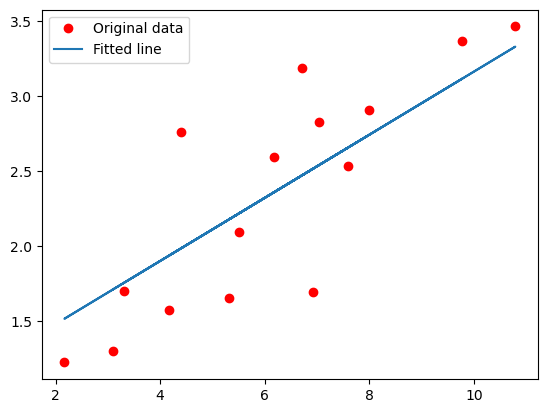

In [5]:
print("Latest model parameters:")
# 第一个 tensor 是权重，第二个 tensor 是偏置
for param in model.parameters():
    print(f'param: {param}\t')

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

按照机器学习的三个基本要素分析上述的代码：
1. 模型：即上述的线性模型：`nn.Linear`；
2. 学习准则：即上述的损失函数：`nn.MSELoss`；
3. 优化算法：即上述的随机梯度下降算法：`torch.optim.SGD`，用于优化调整模型中的参数，使得损失函数最小。


下面将分别对上述的三个要素进行分析。首先是 **模型**。

In [20]:
# 演示 Linear 的使用

input = torch.Tensor([1, 2])  # 样本数据，有两个特征（两个特征值分别是1和2）

model = nn.Linear(2, 1)  # 输入特征数为2，输出特征数为1
output = model(input)  # 将样本输入给模型，输出预测值
print(f'output: {output}\n')

# 查看模型参数
for param in model.parameters():
    # 第一个 tensor 是权重，第二个 tensor 是偏置
    print(f'param: {param}')

# 模型的参数，通过优化算法进行优化，同时使用损失函数进行衡量

output: tensor([1.4402], grad_fn=<AddBackward0>)

param: Parameter containing:
tensor([[-0.4326,  0.6057]], requires_grad=True)
param: Parameter containing:
tensor([0.6613], requires_grad=True)


torch.nn.Linear(in_features, # 输入特征数
           out_features, # 输出特征数
           bias=True # 是否包含偏置
           )

Linear 是对输入进行了线性变换，即：
$$ Y_n_×_o = X_n_×_i W_i_×_o + b $$

其中，$X_{n×i}$ 是输入，$W_{i×o}$ 是权重，$b$ 是偏置，$Y_{n×o}$ 是输出，$n$ 是样本数（输入向量行数），$i$ 是输入特征数，$o$ 是输出特征数。

上述例子，模型有 3 个参数，分别是 w1、w2 和 b，其中 w1 和 w2 是权重，b 是偏置：

$$y=[特征值1,特征值2] * [w_1,w_2]^{\scriptscriptstyle T} + b $$

以下使用代码进行演示：

In [21]:
X = torch.Tensor([
    [0.1, 0.2, 0.3, 0.3, 0.3],
    [0.4, 0.5, 0.6, 0.6, 0.6],
    [0.7, 0.8, 0.9, 0.9, 0.9],
])
print(X)  # 输入向量，n = 3，样本（行数），每个样本5个特征值

in_feature = 5  # i = 5，输入特征数
out_feature = 10  # o = 10，输出特征数

tensor([[0.1000, 0.2000, 0.3000, 0.3000, 0.3000],
        [0.4000, 0.5000, 0.6000, 0.6000, 0.6000],
        [0.7000, 0.8000, 0.9000, 0.9000, 0.9000]])


将上述值套入公式，即
$$ Y_{3×10} = X_{3×5} W_{5×10} + b $$

有三个样本，所以相当于依次进行了三次 $ Y_{1×10} = X_{1×5} W_{5×10} + b $，然后将三个 $Y_{1×10}$ 合并成 $Y_{3×10}$。

In [24]:
model = nn.Linear(in_features=5, out_features=10, bias=True)
print(model(X).size())  # 输出预测值，3个样本，每个样本10个特征值
model(X)

torch.Size([3, 10])


tensor([[-0.2360,  0.3753,  0.6496, -0.3494,  0.0786,  0.0545,  0.0788, -0.0106,
         -0.0744, -0.1825],
        [-0.5388,  0.4829,  0.9422, -0.5532,  0.0965,  0.1692, -0.1080,  0.1030,
          0.0510, -0.4719],
        [-0.8415,  0.5904,  1.2348, -0.7570,  0.1144,  0.2838, -0.2949,  0.2166,
          0.1764, -0.7613]], grad_fn=<AddmmBackward0>)

接下来是 **损失函数**

In [28]:
# 演示 MSELoss 的使用

crit = nn.MSELoss()  # 均方损失函数
target = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float, requires_grad=True)
pred = torch.tensor([[7, 8, 9], [8, 4, 3]], dtype=torch.float, requires_grad=True)
# target = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
# pred = torch.FloatTensor([[7, 8, 9], [8, 4, 3]])

loss = crit(pred, target)  # 将pred,target逐个元素求差,然后求平方,再求和,再求均值
print(f'model auto compute loss: {loss}\n')

sum = 0
for i in range(2):  # 遍历行i
    for j in range(3):  # 遍历列
        sum += (target[i][j] - pred[i][j]) * (target[i][j] - pred[i][j])  # 对应元素做差,然后平方和

print(f'manual compute loss: {sum / 6}' )  # 除以元素个数

model auto compute loss: 22.33333396911621

22.33333396911621
manual compute loss: 22.33333396911621
